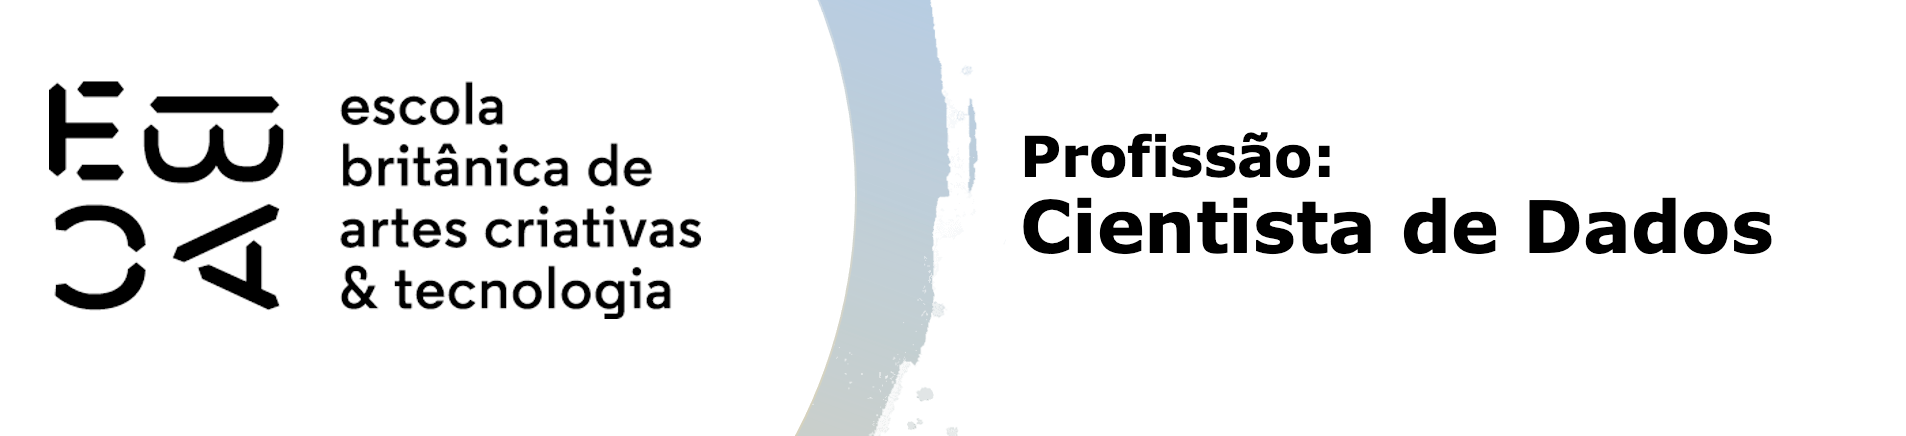

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelo de previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, linear_rainbow
seed = 4868001
import warnings
warnings.filterwarnings("ignore")

In [49]:
dados = pd.read_csv("C:/Users/Allan/Documents/Material de apoio/Módulo 34 - Regressão III/previsao_de_renda_II.csv")
display(dados.isna().sum())
dados['tempo_emprego'] = dados['tempo_emprego'].fillna(dados['tempo_emprego'].rolling(window=30, min_periods=1).mean())
display(dados.isna().sum())

data_ref                      0
index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

data_ref                 0
index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [50]:
df=dados.copy()
df['y']=np.log(df.renda)
df.drop(columns=['index','data_ref'],inplace=True)
display(df.shape)
df.head()

(750000, 13)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,y
0,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14,9.318131
1,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81,7.793508
2,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66,9.528769
3,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84,7.767196
4,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78,6.673020


In [51]:
# Dividindo o dataframe em base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], test_size=1-0.03, random_state=seed)
tot_base=len(X_train)+len(X_test)
print('Conferência das bases:')
print(f'Base teste....: {len(X_test)} linhas = {round((len(X_test) /tot_base*100),2)}%')
print(f'Base treino...: {len(X_train)} linhas = {round((len(X_train) /tot_base*100),2)}%')
print(f'Total.........: {tot_base}')


Conferência das bases:
Base teste....: 727500 linhas = 97.0%
Base treino...: 22500 linhas = 3.0%
Total.........: 750000


## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

In [52]:
# MODELO INICIAL
variaveis=X_train.select_dtypes(include='object').columns.tolist()
X = pd.get_dummies(X_train, drop_first=True)
X = sm.add_constant(X) # adiciona a constante (intercepto) ao modelo
X_columns=X.columns.tolist()
X_columns = [s.replace(' ', '_') for s in X_columns]
X = X.rename(columns=dict(zip(X.columns, X_columns)))
X.drop(columns=['renda'],inplace=True)
y = y_train
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     617.3
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        16:39:56   Log-Likelihood:                -32013.
No. Observations:               22500   AIC:                         6.408e+04
Df Residuals:                   22475   BIC:                         6.428e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             7.3837      0.236     31.224      0.000       6.920       7.847
qtd_filhos                       -0.1054      0.109     -0.964      0.335      -0.320       0.109
idade                             0.0042      0.001      4.815      0.000       0.003       0.006
tempo_emprego                     0.1274      0.001    109.636      0.000       0.125       0.130
qt_pessoas_residencia             0.1202      0.109      1.102      0.271      -0.094       0.334
sexo_M                            0.1494      0.016      9.467      0.000       0.118       0.180
posse_de_veiculo_S                0.0017      0.015      0.112      0.911      -0.028       0.031
posse_de_imovel_S                 0.1796      0.015     12.197      0.000       0.151       0.208
tipo_renda_Bolsista              -0.0212      0.260     -0.082      0.935      -0.531       0.488
tipo_renda_Empresário             0.1557      0.017      9.148      0.000       0.122       0.189
tipo_renda_Pensionista           -0.2897      0.024    -11.989      0.000      -0.337      -0.242
tipo_renda_Servidor_público       0.1436      0.025      5.790      0.000       0.095       0.192
educacao_Médio                    0.1418      0.064      2.199      0.028       0.015       0.268
educacao_Pós_graduação            0.0975      0.192      0.508      0.611      -0.279       0.474
educacao_Superior_completo        0.1006      0.065      1.545      0.122      -0.027       0.228
educacao_Superior_incompleto      0.1368      0.073      1.870      0.062      -0.007       0.280
estado_civil_Separado             0.1764      0.113      1.562      0.118      -0.045       0.398
estado_civil_Solteiro             0.1323      0.110      1.198      0.231      -0.084       0.349
estado_civil_União                0.0042      0.025      0.167      0.867      -0.045       0.054
estado_civil_Viúvo                0.1300      0.115      1.136      0.256      -0.094       0.354
tipo_residencia_Casa             -0.0475      0.056     -0.847      0.397      -0.158       0.062
tipo_residencia_Com_os_pais      -0.0335      0.064     -0.523      0.601      -0.159       0.092
tipo_residencia_Comunitário      -0.0383      0.119     -0.322      0.747      -0.271       0.194
tipo_residencia_Estúdio          -0.0224      0.099     -0.226      0.821      -0.216       0.171
tipo_residencia_Governamental    -0.1137      0.067     -1.688      0.091      -0.246       0.018
==============================================================================
Omnibus:                      123.262   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.372
Skew:                          -0.019   Prob(JB):                     6.46e-20
Kurtosis:              

In [6]:
# SELEÇÃO DE VARIÁVEIS
import ipywidgets as widgets
from statsmodels.formula.api import ols

var_dum = str(input('Incluir variáveis dummie no modelo? '))

if var_dum.lower() == 's':
    variaveis = X.columns.tolist()[1:]  
elif var_dum.lower() =='n':
    variaveis = sorted(X.select_dtypes(exclude='uint8').columns.tolist()[1:])
else:
    print('Opção incorreta')

print('\nSelecione as variáveis do modelo')

checkboxes = [widgets.Checkbox(description=variavel, value=False) for variavel in variaveis]
select_all_button = widgets.Button(description='Selecionar todas')
box = widgets.VBox(children=[select_all_button] + checkboxes)

selecionados = []

def select_all(button):
    for checkbox in checkboxes:
        checkbox.value = True

def on_checkbox_change(change):
    global selecionados
    selecionados = [checkbox.description for checkbox in checkboxes if checkbox.value]
#     Display(f'Variáveis selecionadas: {selecionados}')

for checkbox in checkboxes:
    checkbox.observe(on_checkbox_change, names='value')
select_all_button.on_click(select_all)
display(box)



Incluir variáveis dummie no modelo? n

Selecione as variáveis do modelo


In [10]:
%%time
formula = 'y ~ {}'.format(' + '.join(selecionados))
modelo = ols(formula=formula, data=X)
resultado = modelo.fit()
Xp = resultado.predict()
st_res = resultado.outlier_test()
resultado.summary()

CPU times: total: 6min 47s
Wall time: 1min 13s


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     6924.
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        16:17:50   Log-Likelihood:                -32313.
No. Observations:               22500   AIC:                         6.463e+04
Df Residuals:                   22497   BIC:                         6.466e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2233      0.027    300.712      0.000       8.170       8.277
idade            -0.0040      0.001     -6.388      0.000      -0.005      -0.003
tempo_emprego     0.1299      0.001    115.113      0.000       0.128       0.132
==============================================================================
Omnibus:                      113.927   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.602
Skew:                          -0.016   Prob(JB):                     1.16e-18
Kurtosis:                       2.705   Cond. No.                         185.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

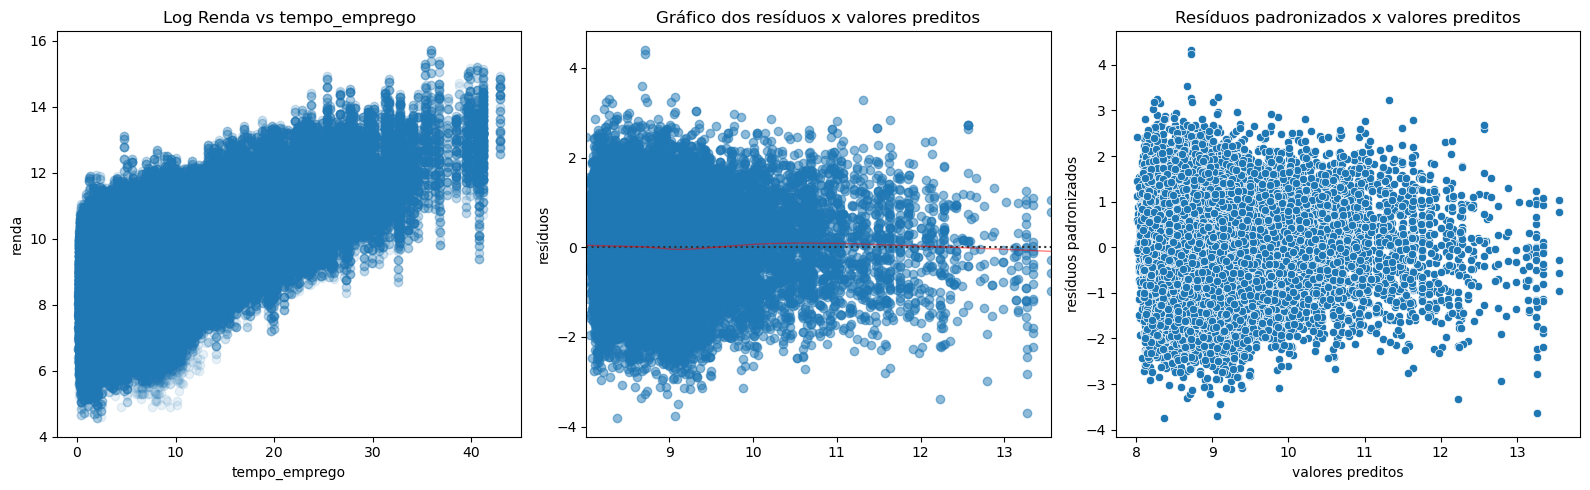

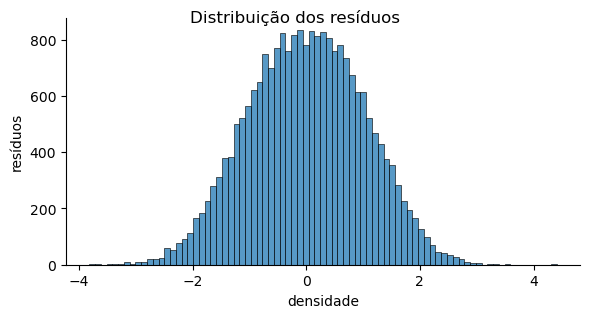

CPU times: total: 23.6 s
Wall time: 22.7 s


In [11]:
%%time
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

# Primeiro gráfico
ax1.scatter(x=df.tempo_emprego, y=df.y, label='tempo_emprego', alpha=.1)
ax1.set_xlabel('tempo_emprego')
ax1.set_ylabel('renda')
ax1.set_title('Log Renda vs tempo_emprego')

# Segundo gráfico
sns.residplot(x=Xp, y=y, data=X, lowess=True, 
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.5}, ax=ax2)
# ax2.set_xlabel('valores preditos')
ax2.set_ylabel('resíduos')
ax2.set_title('Gráfico dos resíduos x valores preditos')

# Quarto gráfico
sns.scatterplot(x=Xp, y=st_res.student_resid, ax=ax3)
ax3.set_xlabel('valores preditos')
ax3.set_ylabel('resíduos padronizados')
ax3.set_title('Resíduos padronizados x valores preditos')

plt.tight_layout()

sns.displot(resultado.resid, height=3, aspect=2).set_axis_labels("densidade", "resíduos")
plt.gcf().suptitle("Distribuição dos resíduos")


plt.show();


## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

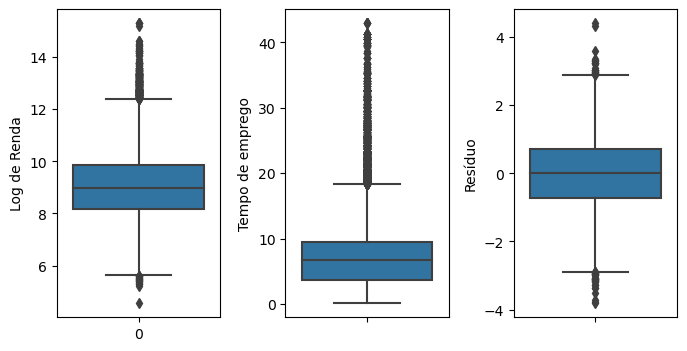

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(8,4))
plt.subplots_adjust(wspace=.4, hspace=0)

sns.boxplot(y.values, ax=ax[0])
sns.boxplot(y='tempo_emprego', data=X, ax=ax[1])
sns.boxplot(y=resultado.resid, data=X, ax=ax[2])

ax[0].set_ylabel('Log de Renda')
ax[1].set_ylabel('Tempo de emprego')
ax[2].set_ylabel('Resíduo');


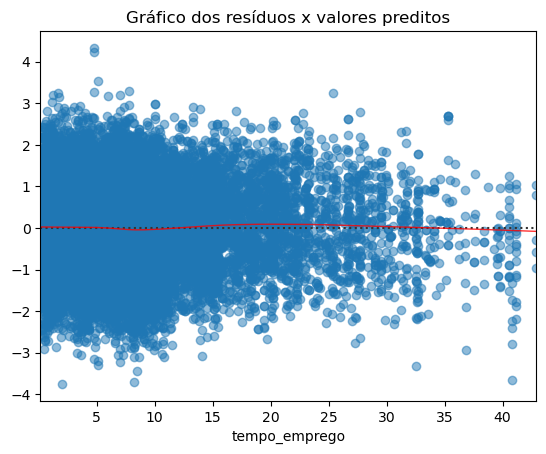

In [13]:
sns.residplot(x=X.tempo_emprego, y=st_res.student_resid.values, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title('Gráfico dos resíduos x valores preditos');

Número de pontos mais relevantes a observar: 30


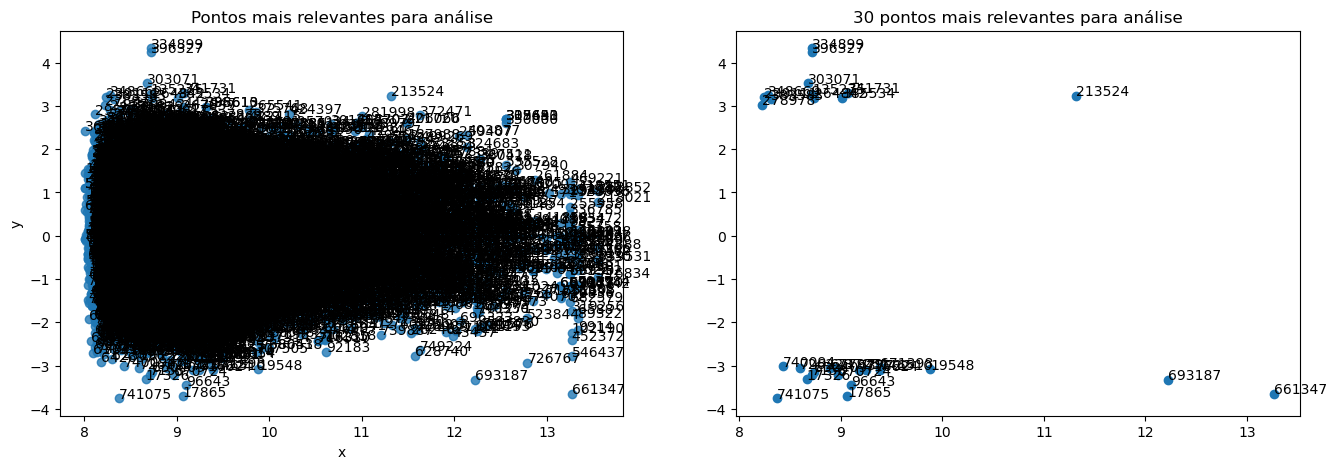

CPU times: total: 1min 25s
Wall time: 1min 25s


In [14]:
%%time
n_top=int(input('Número de pontos mais relevantes a observar: '))
fig, axs = plt.subplots(ncols=2, figsize=(16, 5))

# Primeiro gráfico
df_res= pd.DataFrame()
df_res = pd.DataFrame({'y': st_res.student_resid})
df_res['x']=Xp

sns.regplot(x = 'x', y = 'y', data=df_res, ax=axs[0])

for i, txt in enumerate(df_res.index.values):
    axs[0].annotate(str(txt), (df_res.loc[txt,'x'], df_res.loc[txt,'y']))

# Segundo gráfico
idx_top = np.argsort(np.abs(st_res.student_resid))[-n_top:]
Xp_top = Xp[idx_top]
res_top = st_res.student_resid.iloc[idx_top]
X_top = X.iloc[idx_top]

axs[1].scatter(x=Xp_top, y=res_top)
axs[1].set_title(f'{n_top} pontos mais relevantes para análise')
axs[0].set_title(f'Pontos mais relevantes para análise')
for i, txt in enumerate(X_top.index.values):
    axs[1].annotate(str(txt), (Xp_top[i], res_top.to_numpy()[i]))

plt.show()


CPU times: total: 5min 55s
Wall time: 1min 8s


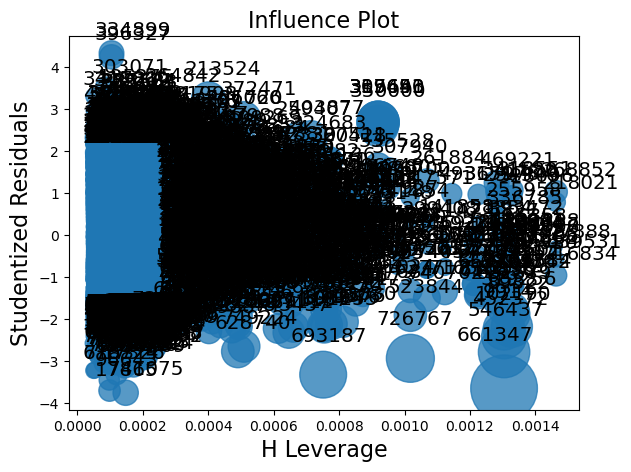

In [15]:
%%time
reg = smf.ols(formula, data=X).fit()
fig = sm.graphics.influence_plot(reg, criterion="cooks")
fig.tight_layout(pad=1.0)

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

### Matriz de correlação de Spearman

,educacao_Médio,educacao_Pós_graduação,educacao_Superior_completo,educacao_Superior_incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,idade,posse_de_imovel_S,...,tempo_emprego,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,tipo_renda_Servidor_público,tipo_residencia_Casa,tipo_residencia_Com_os_pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
educacao_Médio,1.000000,-0.045763,-0.898508,-0.243073,0.003338,-0.035169,0.019517,0.051193,0.161648,0.014355,...,0.049149,-0.031822,-0.076131,0.091402,-0.088598,0.004118,-0.029408,-0.036242,-0.017334,0.040501
educacao_Pós_graduação,-0.045763,1.000000,-0.027089,-0.007328,-0.009153,-0.006544,-0.002053,-0.007824,-0.007880,0.025982,...,-0.033865,-0.000959,0.036888,-0.016868,-0.011554,0.012387,-0.007884,-0.002380,-0.003063,-0.006690
educacao_Superior_completo,-0.898508,-0.027089,1.000000,-0.143885,0.004744,0.027134,-0.033755,-0.042083,-0.113792,-0.001490,...,-0.026617,0.035416,0.065707,-0.082739,0.093747,0.015209,0.008832,0.024954,0.017352,-0.035570
educacao_Superior_incompleto,-0.243073,-0.007328,-0.143885,1.000000,-0.016378,0.026414,0.026833,-0.018354,-0.153616,-0.055334,...,-0.050232,-0.005096,0.046576,-0.072193,0.009596,-0.040258,0.051458,0.009363,0.006586,-0.019437
estado_civil_Separado,0.003338,-0.009153,0.004744,-0.016378,1.000000,-0.091950,-0.072400,-0.051908,0.060382,-0.010529,...,0.004713,-0.006365,0.009998,-0.005193,-0.006496,0.013332,-0.006148,-0.000799,0.012376,-0.007097
estado_civil_Solteiro,-0.035169,-0.006544,0.027134,0.026414,-0.091950,1.000000,-0.109637,-0.078605,-0.064601,0.001290,...,-0.044113,-0.009638,0.031727,-0.015205,0.003057,-0.051432,0.033701,0.003733,-0.012553,0.006680
estado_civil_União,0.019517,-0.002053,-0.033755,0.026833,-0.072400,-0.109637,1.000000,-0.061893,-0.057594,-0.041838,...,-0.026399,-0.007589,0.035148,-0.026497,-0.001009,-0.011521,0.032295,-0.018826,0.013884,-0.011475
estado_civil_Viúvo,0.051193,-0.007824,-0.042083,-0.018354,-0.051908,-0.078605,-0.061893,1.000000,0.208076,0.042729,...,0.050896,-0.005441,-0.063134,0.195213,-0.015026,0.038681,-0.040373,0.007220,-0.017373,0.002476
idade,0.161648,-0.007880,-0.113792,-0.153616,0.060382,-0.064601,-0.057594,0.208076,1.000000,0.138530,...,0.303018,0.018350,-0.169075,0.590194,-0.068111,0.160968,-0.192016,-0.023929,0.001737,0.007266
posse_de_imovel_S,0.014355,0.025982,-0.001490,-0.055334,-0.010529,0.001290,-0.041838,0.042729,0.138530,1.000000,...,0.025715,0.018067,-0.002778,0.097738,-0.015301,0.200575,-0.148772,-0.030806,-0.034729,-0.119725


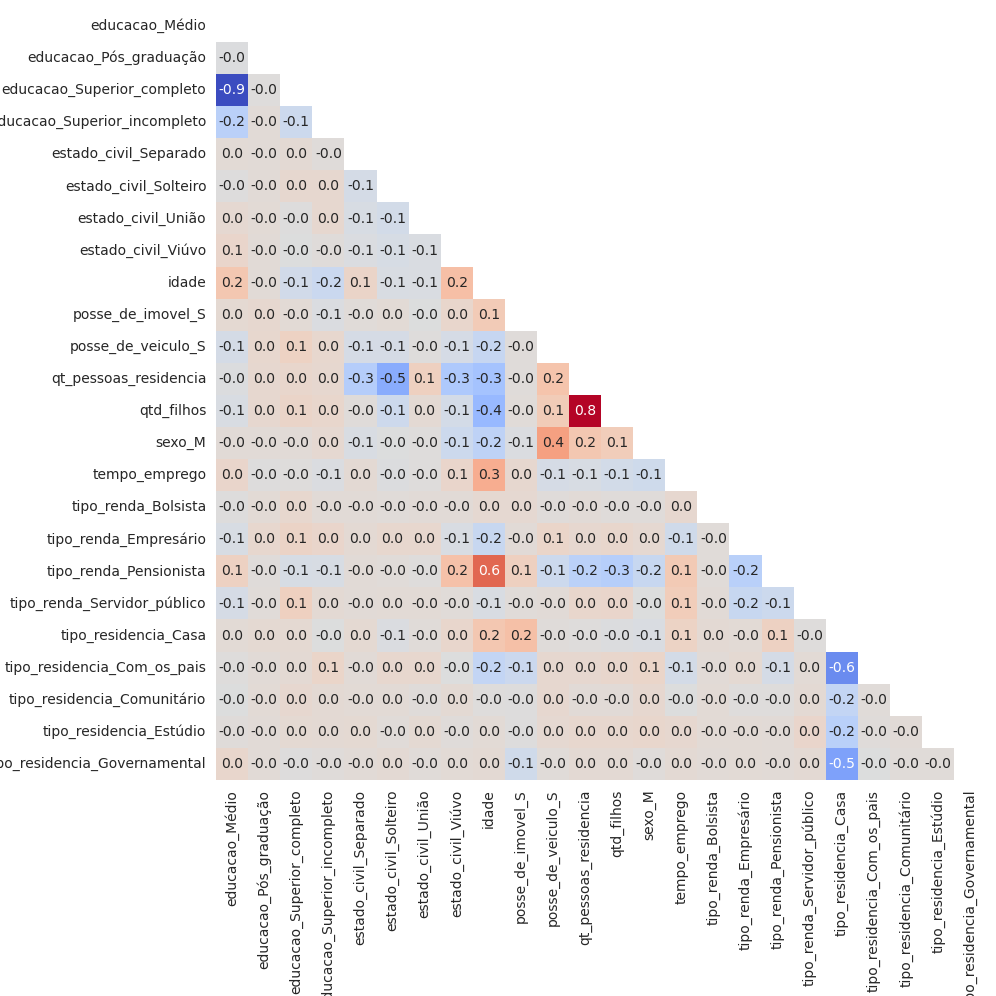

In [16]:
# corr_var = sorted(X.select_dtypes(exclude='uint8').columns.tolist()[1:])
corr_var = sorted(X.columns.tolist()[1:])
correlacao = X[corr_var].corr(method='spearman')
cores = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
#     f, ax = plt.subplots(figsize=(6, 4))
    ax = sns.heatmap(correlacao, cmap='coolwarm', mask=mask, cbar=False, square=True, fmt='.1f', annot=True)

display(X[corr_var].corr(method='spearman'))

### Análise do VIF - Variance Inflation Factor

In [102]:
import scipy.stats as ss 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [103]:
vars_vif = pd.DataFrame()
vars_vif["VIF Factor"] = [vif(X[corr_var], i) for i in range(X[corr_var].shape[1])]
vars_vif["Feature"] = X[corr_var].columns

vars_vif.sort_values('VIF Factor',ascending=False).round(2)

,VIF Factor,Feature
11,227.14,qt_pessoas_residencia
19,60.20,tipo_residencia_Casa
0,51.93,educacao_Médio
8,34.74,idade
12,32.95,qtd_filhos
2,30.51,educacao_Superior_completo
5,5.52,estado_civil_Solteiro
3,4.20,educacao_Superior_incompleto
20,3.79,tipo_residencia_Com_os_pais
4,3.36,estado_civil_Separado


In [104]:
# Escolhendo as variáveis com VIF menor que 5
vars_vif5 = vars_vif[(vars_vif['VIF Factor']<=5)].sort_values('VIF Factor',ascending=False).round(2)
vars_vif5

,VIF Factor,Feature
3,4.20,educacao_Superior_incompleto
20,3.79,tipo_residencia_Com_os_pais
4,3.36,estado_civil_Separado
9,3.24,posse_de_imovel_S
23,3.07,tipo_residencia_Governamental
14,2.97,tempo_emprego
7,2.91,estado_civil_Viúvo
17,2.22,tipo_renda_Pensionista
10,1.96,posse_de_veiculo_S
13,1.81,sexo_M


In [56]:
%%time
formula_vif = 'y ~ {}'.format(' + '.join(vars_vif5['Feature'].tolist()))
modelo = ols(formula=formula_vif, data=X)
resultado = modelo.fit()
Xp = resultado.predict()
st_res = resultado.outlier_test()
resultado.summary()

CPU times: total: 26min 33s
Wall time: 4min 49s


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     868.0
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        16:46:19   Log-Likelihood:                -32033.
No. Observations:               22500   AIC:                         6.410e+04
Df Residuals:                   22482   BIC:                         6.425e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         7.8743      0.019    418.428      0.000       7.837       7.911
educacao_Superior_incompleto     -0.0072      0.036     -0.202      0.840      -0.077       0.062
tipo_residencia_Com_os_pais      -0.0099      0.034     -0.295      0.768      -0.076       0.056
estado_civil_Separado             0.0632      0.029      2.168      0.030       0.006       0.120
posse_de_imovel_S                 0.1846      0.015     12.586      0.000       0.156       0.213
tipo_residencia_Governamental    -0.0618      0.039     -1.593      0.111      -0.138       0.014
tempo_emprego                     0.1292      0.001    116.957      0.000       0.127       0.131
estado_civil_Viúvo                0.0288      0.034      0.841      0.401      -0.038       0.096
tipo_renda_Pensionista           -0.2257      0.020    -11.563      0.000      -0.264      -0.187
posse_de_veiculo_S               -0.0048      0.015     -0.321      0.748      -0.034       0.024
sexo_M                            0.1461      0.016      9.307      0.000       0.115       0.177
tipo_renda_Empresário             0.1513      0.017      8.917      0.000       0.118       0.185
tipo_residencia_Estúdio           0.0274      0.082      0.334      0.738      -0.134       0.188
tipo_residencia_Comunitário      -0.0092      0.105     -0.088      0.930      -0.216       0.197
tipo_renda_Servidor_público       0.1342      0.025      5.437      0.000       0.086       0.183
estado_civil_União               -0.0014      0.025     -0.056      0.955      -0.050       0.048
educacao_Pós_graduação           -0.0140      0.181     -0.077      0.938      -0.369       0.341
tipo_renda_Bolsista              -0.0265      0.260     -0.102      0.919      -0.536       0.483
==============================================================================
Omnibus:                      128.154   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.351
Skew:                          -0.020   Prob(JB):                     1.46e-20
Kurtosis:                       2.690   Cond. No.                         388.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# lista das variáveis com VIF Factor < 5
selected_features = vars_vif5['Feature'].tolist()

# criar matriz de features com as variáveis selecionadas
Xvif = X[selected_features].values

# padronizar os dados
scaler = StandardScaler()
X_std = scaler.fit_transform(Xvif)

# criar objeto PCA
pca = PCA()

# aplicar PCA aos dados padronizados
X_pca=pca.fit(X_std)

# imprimir as componentes principais
print(f'Componentes: {pca.components_.shape}')


Componentes: (17, 17)


In [109]:
def screeplot(princomp, ncomp = 0, varexplicada=0, criterio=1):
    
    if ncomp>0:
        ncomp_crit=ncomp
    elif varexplicada > 0:
        ncomp_crit = (princomp.explained_variance_ratio_.cumsum()<varexplicada).sum()+1 
        # Critério 1: autovalor padronizado > 1
    elif criterio == 1:
        ncomp_crit = (princomp.explained_variance_ratio_>1/princomp.n_components_).sum()
    else: ncomp_crit = None
    
    fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
    plt.subplots_adjust(hspace=0, wspace=.15)


    num_componentes = np.arange(princomp.n_components_) + 1
    ax[0,0].plot(num_componentes, princomp.explained_variance_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[0,0].set_title('Scree Plot - Variância total')
    ax[0,0].set_xlabel('Número de componentes')
    ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

    ax[1,0].plot(num_componentes, princomp.explained_variance_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[1,0].set_xlabel('Número de componentes')
    ax[1,0].set_ylabel('Variancia explicada (Acumulada)')


    ax[0,1].plot(num_componentes, princomp.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[0,1].set_title('Scree Plot - Variância percentual')
    ax[0,1].set_xlabel('Número de componentes')
    ax[0,1].set_ylabel('Variancia explicada (percentual)')

    ax[1,1].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[1,1].set_xlabel('Número de componentes')
    ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')
    
    if ncomp_crit != None:
        # Linhas verticais de referência
        ax[0,0].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)
        ax[1,1].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)
        ax[1,0].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)
        ax[0,1].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)


        # linhas horizontais
        variancia               = princomp.explained_variance_[ncomp_crit-1]
        variancia_acumulada     = princomp.explained_variance_.cumsum()[ncomp_crit-1]
        pct_variancia           = princomp.explained_variance_ratio_[ncomp_crit-1]
        pct_variancia_acumulada = princomp.explained_variance_ratio_.cumsum()[ncomp_crit-1]
        
        ax[0,0].axhline(y = variancia              , color = 'r', linestyle = '-', linewidth=.5)
        ax[1,0].axhline(y = variancia_acumulada    , color = 'r', linestyle = '-', linewidth=.5)
        ax[0,1].axhline(y = pct_variancia          , color = 'r', linestyle = '-', linewidth=.5)
        ax[1,1].axhline(y = pct_variancia_acumulada, color = 'r', linestyle = '-', linewidth=.5)


    print(f'Número de componentes:............... {ncomp_crit}')
    print(f'Variância da ultima CP:.............. {variancia:.2f}' )
    print(f'Variância total explicada:........... {variancia_acumulada:.2f}' )
    print(f'Variância percentual da última CP:... {100*pct_variancia:.2f}%' )
    print(f'Variância percentual total explicada: {100*pct_variancia_acumulada:.2f}%' )
    plt.show()
    return ncomp_crit

Número de componentes:............... 11
Variância da ultima CP:.............. 0.98
Variância total explicada:........... 12.45
Variância percentual da última CP:... 5.75%
Variância percentual total explicada: 73.26%


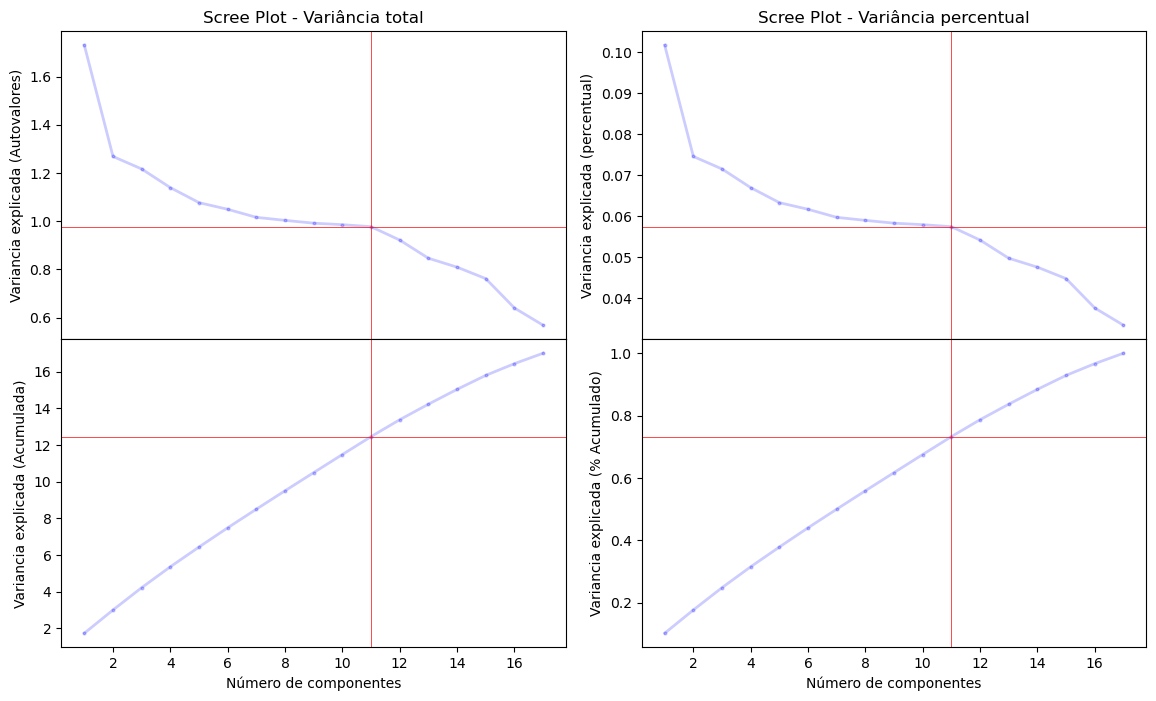

In [65]:
prcomp = PCA().fit(X_std)
ncomp = screeplot(prcomp, varexplicada=.7)

In [110]:
#ncomp=15
selected_features = vars_vif5['Feature'].tolist()

# Carregando o conjunto de dados
X_=X[selected_features].copy()
y_=y

# Normalizando os dados
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_)

# Criando um modelo PCA com 2 componentes principais
pca = PCA(n_components=ncomp)
pca_colunas = ['cp'+str(x+1) for x in list(range(ncomp))]
# Treinando o modelo PCA com os dados normalizados
pca.fit(X_norm)

# Obtendo os componentes principais do modelo PCA
cp = pca.transform(X_norm)
cp_df = pd.DataFrame(cp, columns=pca_colunas)

# Adicionando a coluna cp ao conjunto de dados
X_cp = sm.add_constant(cp_df)

# Reindexando os dataframes
X_cp = X_cp.reset_index(drop=True)
y_ = y_.reset_index(drop=True)

# Treinando o modelo de regressão OLS com as componentes principais
model = sm.OLS(y_, X_cp)
result = model.fit()

# Imprimindo o resultado do modelo
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     956.7
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        17:41:33   Log-Likelihood:                -32157.
No. Observations:               22500   AIC:                         6.435e+04
Df Residuals:                   22484   BIC:                         6.447e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0554      0.007   1343.970      0.000       9.042       9.069
cp1           -0.1172      0.005    -22.875      0.000      -0.127      -0.107
cp2            0.3457      0.006     57.788      0.000       0.334       0.357
cp3            0.1214      0.006     19.872      0.000       0.109       0.133
cp4            0.3056      0.006     48.410      0.000       0.293       0.318
cp5           -0.0564      0.006     -8.684      0.000      -0.069      -0.044
cp6            0.1143      0.007     17.382      0.000       0.101       0.127
cp7            0.0688      0.007     10.289      0.000       0.056       0.082
cp8           -0.0265      0.007     -3.943      0.000      -0.040      -0.013
cp9           -0.0165      0.007     -2.436      0.015      -0.030      -0.003
cp10          -0.1186      0.007    -17.480      0.000      -0.132      -0.105
cp11          -0.1017      0.007    -14.918      0.000      -0.115      -0.088
cp12          -0.1458      0.007    -20.772      0.000      -0.160      -0.132
cp13           0.5244      0.007     71.597      0.000       0.510       0.539
cp14          -0.0082      0.007     -1.098      0.272      -0.023       0.006
cp15           0.2626      0.008     34.014      0.000       0.247       0.278
==============================================================================
Omnibus:                      131.128   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.770
Skew:                          -0.013   Prob(JB):                     7.16e-21
Kurtosis:                       2.687   Cond. No.                         1.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.